In [1]:
#Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-17.142749163710832 17.43335383083368
21.885143572239045 -78.67416628381514
-66.32096498408947 130.48161416746404
-55.56630747289406 153.36899347358883
-87.77033805618981 -5.700543233888567
44.71769411562724 167.7516544392625
3.2357977988329054 -92.71996389608826
23.04423020821274 -93.13117697011853
28.454806892514767 -120.95076001237643
-72.10481067850174 27.356232804724414
26.945500706893085 -29.111339309096678
28.829817912450878 -100.79851320539714
71.28998154673857 -79.7090027431956
46.414948864980374 104.19041420734032
47.005373366742134 -48.62625041225883
-80.92783659690163 -54.54565696562855
-42.3100373454934 -53.75106529601513
9.256916902384319 146.04110266329587
47.07885185508101 -40.451013018885305
64.6277384812592 171.38356587096177
40.62023813839218 -134.59714448372262
-48.193809052717256 -124.16175515098304
-47.37395915216515 -61.67565538363249
12.064182768287978 -115.81136639463942
-50.32611569534281 -46.41835752123001
79.6471591090106 -138.9112810363875
-23.5386764978425

-89.13615287242085 -5.7309244269561646
-37.55617047469843 5.414504184224057
-69.41380198948383 90.06189412106562
-9.2857731649285 -34.81031456500466
-22.85489771070553 153.10231972007756
-9.951667962041086 -91.53497950911448
-67.54725029741694 108.24029623280626
-46.972331333580804 -124.29370553099774
-25.64098036163753 -159.07117304001895
-56.661473283005805 45.35937618543923
-57.72797256549764 33.44722124206831
41.49131441351503 67.7273784094991
-23.72868734796384 58.96787712163902
-53.92770669611753 -139.57912987713726
-71.1776870513466 29.825591564693184
77.2008609822538 -127.64403884192254
63.59853564983936 45.86842511801373
-23.24908719643159 90.84007074035378
48.10735320103936 42.84638032891942
-86.19768033480382 -105.47431405925505
86.00132438545671 -22.322987725221765
-80.21282532381524 -58.68296108872819
-46.58231562243988 145.46197562114844
-57.070152323581404 105.98473975366369
86.87078892264947 114.837699785074
-60.16353481148032 -52.97997165762931
-85.20973386158613 176.6

In [5]:
from citipy import citipy

In [16]:
#Create a list for holding the cities.
cities = []
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

588

In [17]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

#Import the time library and the datetime module.
import time
from datetime import datetime

In [18]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ec9f057ac44315d336e8d13b96653c3a


In [35]:
#Create an empty list to hold the weather data. 
city_data = []
#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    #Group in sets of 50.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+") 
    
    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | eenhana
Processing Record 2 of Set 1 | ciego de avila
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | celestun
Processing Record 9 of Set 1 | san quintin
Processing Record 10 of Set 1 | kruisfontein
Processing Record 11 of Set 1 | ponta do sol
Processing Record 12 of Set 1 | piedras negras
Processing Record 13 of Set 1 | clyde river
Processing Record 14 of Set 1 | mandalgovi
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | lorengau
Processing Record 19 of Set 1 | komsomolskiy
Processing Record 20 of Set 1 | eureka
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | rawson
Processing R

Processing Record 40 of Set 4 | nexo
Processing Record 41 of Set 4 | qaanaaq
Processing Record 42 of Set 4 | tura
Processing Record 43 of Set 4 | necochea
Processing Record 44 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 45 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 46 of Set 4 | berdigestyakh
Processing Record 47 of Set 4 | trelleborg
Processing Record 48 of Set 4 | tiksi
Processing Record 49 of Set 4 | luderitz
Processing Record 50 of Set 4 | grand gaube
Processing Record 1 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 5 | hasaki
Processing Record 3 of Set 5 | hami
Processing Record 4 of Set 5 | leshukonskoye
Processing Record 5 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 5 | vila franca do campo
Processing Record 7 of Set 5 | faanui
Processing Record 8 of Set 5 | maragogi
Processing Record 9 of Set 5 | pavlovka
Processing Record 10 of Set 5 | santa maria
Processing 

Processing Record 26 of Set 8 | batsfjord
Processing Record 27 of Set 8 | puerto escondido
Processing Record 28 of Set 8 | matara
Processing Record 29 of Set 8 | halalo
City not found. Skipping...
Processing Record 30 of Set 8 | la union
Processing Record 31 of Set 8 | tuatapere
Processing Record 32 of Set 8 | the valley
Processing Record 33 of Set 8 | ghatal
Processing Record 34 of Set 8 | tarudant
City not found. Skipping...
Processing Record 35 of Set 8 | kota belud
Processing Record 36 of Set 8 | wahran
City not found. Skipping...
Processing Record 37 of Set 8 | batemans bay
Processing Record 38 of Set 8 | chara
Processing Record 39 of Set 8 | cockburn town
Processing Record 40 of Set 8 | pevek
Processing Record 41 of Set 8 | zlobin
Processing Record 42 of Set 8 | altar
Processing Record 43 of Set 8 | esso
Processing Record 44 of Set 8 | marrakesh
Processing Record 45 of Set 8 | griffith
Processing Record 46 of Set 8 | katunino
Processing Record 47 of Set 8 | camana
Processing Reco

Processing Record 14 of Set 12 | trairi
Processing Record 15 of Set 12 | sorkjosen
Processing Record 16 of Set 12 | shaowu
Processing Record 17 of Set 12 | mossendjo
Processing Record 18 of Set 12 | kirkenes
Processing Record 19 of Set 12 | arona
Processing Record 20 of Set 12 | port augusta
Processing Record 21 of Set 12 | qaqortoq
Processing Record 22 of Set 12 | kolpny
Processing Record 23 of Set 12 | kankon
Processing Record 24 of Set 12 | mabaruma
Processing Record 25 of Set 12 | hualmay
Processing Record 26 of Set 12 | meulaboh
Processing Record 27 of Set 12 | luau
Processing Record 28 of Set 12 | iquitos
Processing Record 29 of Set 12 | zomba
Processing Record 30 of Set 12 | savinka
Processing Record 31 of Set 12 | saint-georges
Processing Record 32 of Set 12 | mandal
Processing Record 33 of Set 12 | broken hill
Processing Record 34 of Set 12 | tlahualilo
City not found. Skipping...
Processing Record 35 of Set 12 | piacabucu
Processing Record 36 of Set 12 | lixourion
Processing 

In [36]:
print(len(city_data))

538


In [37]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Eenhana,-17.4667,16.3333,69.46,18,52,4.59,NA,2022-10-06 01:46:08
1,Ciego De Avila,21.8400,-78.7619,74.64,72,29,6.11,CU,2022-10-06 01:49:43
2,New Norfolk,-42.7826,147.0587,58.91,61,100,11.65,AU,2022-10-06 01:49:44
3,Hobart,-42.8794,147.3294,59.25,69,75,14.97,AU,2022-10-06 01:49:39
4,Hermanus,-34.4187,19.2345,45.81,82,3,12.57,ZA,2022-10-06 01:49:44
5,Nikolskoye,59.7035,30.7861,49.91,98,99,8.01,RU,2022-10-06 01:48:04
6,Puerto Ayora,-0.7393,-90.3518,67.55,93,95,5.99,EC,2022-10-06 01:48:40
7,Celestun,20.8667,-90.4000,77.43,64,4,12.55,MX,2022-10-06 01:49:46
8,San Quintin,30.4833,-115.9500,68.85,82,59,6.62,MX,2022-10-06 01:49:46
9,Kruisfontein,-34.0033,24.7314,53.89,90,0,5.88,ZA,2022-10-06 01:49:46


In [38]:
city_data_df = city_data_df.reindex(["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"], axis=1)
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Eenhana,52,NA,2022-10-06 01:46:08,18,-17.4667,16.3333,69.46,4.59
1,Ciego De Avila,29,CU,2022-10-06 01:49:43,72,21.8400,-78.7619,74.64,6.11
2,New Norfolk,100,AU,2022-10-06 01:49:44,61,-42.7826,147.0587,58.91,11.65
3,Hobart,75,AU,2022-10-06 01:49:39,69,-42.8794,147.3294,59.25,14.97
4,Hermanus,3,ZA,2022-10-06 01:49:44,82,-34.4187,19.2345,45.81,12.57
...,...,...,...,...,...,...,...,...,...
533,Mandal,89,IN,2022-10-06 02:04:36,79,25.4500,74.5667,76.68,4.99
534,Broken Hill,0,AU,2022-10-06 02:00:44,23,-31.9500,141.4333,78.21,14.20
535,Piacabucu,6,BR,2022-10-06 02:04:36,92,-10.4056,-36.4344,75.04,7.70
536,Lixourion,9,GR,2022-10-06 02:04:37,66,38.2019,20.4314,66.34,7.27


In [39]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [40]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

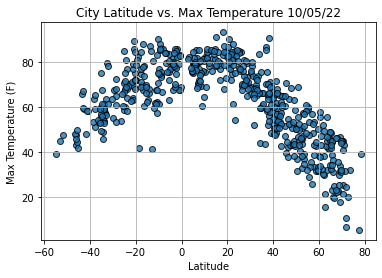

In [41]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()